# Objectives: 
- To understand different scaling techinques.
- To understand when a specific model/data requires a scaling techinque.
- To apply scaling techniques.

# Lets take a look at the Multiple Linear Regression below.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from functions import * 
%matplotlib inline

baseball = pd.read_csv('data/baseball_height_weight.csv')
baseball.head()

,name,team,position,height_in,weight_lb,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [ ]:
# Lets run our OLS model for weight_ib on height_in and age


### <span style="color:blue">With your partner, interpret the coefficient values above.</span>

(with a one year increase in age, weight increases by .9lbs + with a one inch increase in height, weight increased by 4.9lbs + when height and age are zero, weight is a base of -192lbs)

### <span style="color:blue">Given your interpretation of the coefficients, which feature is more important to predicting the target (weight)?</span>


(we cannot say which is more important because these coefficients are being judged on different scales - so we want to apply a standard scalar so that our coefficients can be interpretted as relative effect sizes)

# What is Feature Scaling?
Scaling data is the process of **increasing or decreasing the magnitude according to a fixed ratio.** You change the size but not the shape of the data.

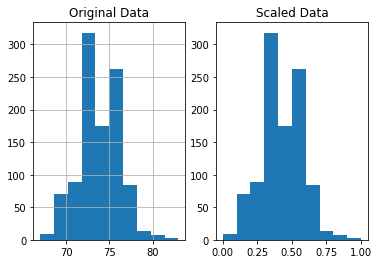

In [4]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(baseball['height_in'].values.reshape(-1, 1))

ax1 = plt.subplot(1, 2, 1)
baseball['height_in'].hist(ax = ax1)
ax1.set_title('Original Data')

ax2 = plt.subplot(1, 2, 2)
ax2.hist(scaled_data)
ax2.set_title('Scaled Data')
plt.show()

^^ Notice the change in the X-axis' scale. But NOT the shape of the distribution

## Why do we need to use feature scaling?

- In order to compare the magnitude of coefficients thus increasing the interpretability of coefficients.
- It helps handling disparities in units.
- Some models use euclidean distance in their computations.
- Some models require features to be on equivalent scales.
- In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely.
- Some algorithms are sensitive to the scale of the data.

## When do we use feature scaling?
- in the preprocessing phase.

## How do we perform feature scaling?

The common types of feature scaling are:

- Min/Max Scaling
- Standardization

# [MinMax Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler)

\begin{align}
X_{norm} & = \frac{X - X_{min}}{X_{max}-X_{min}} \\
\end{align}

In [10]:
# import MinMaxScaler


# Instantiate MinMaxScaler object


# Fit and Transform the relevant features


# Set y to the target variable
# Set X to standardized features
# Add a constant using statsmodel

# Using Ordinary Least Squares (OLS - from StatsModel), fit a model to our X and y.

# Output the summary of the model. Label the coefficients as below. 

Lets interpret this:

- 1 unit increase in height estimates +79.56 lbs of weight
- 1 unit increase in age estimates +26.6 lbs of weight

Makes it easier to compare different quantity measurements with each other.

# Now try applying Standardization to the same dataset

The most common method of scaling is standardization.  In this method we center the data, then we divide by the standard devation to enforce that the standard deviation of the variable is one:

$X_{std} = \cfrac{X-\bar{X}}{s_X}$


### Now lets look at how we can apply standardization using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler).

In [12]:
# Your turn to try from scratch with Sklearn!


### <span style="color:blue">With your partner, re-interpret the coefficient values above.</span>


(with a one **standard deviation** increase in age, weight increases by 4.16lbs + with a one **standard deviation** increase in height, weight increased by 11.46lbs + when height and age are **average**, weight is a base of 201.67lbs)

### <span style="color:blue">Given your interpretation of the coefficients, which feature is more important to predicting the target (weight)?</span>

(Since our coefficients are now scaled relative to each other, we can confidently compare the two and state that height plays a more important factor in determining weight.)

# How do we implement scaling with sklearn and a test-train split?

In [8]:
# Import appropriate models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Read in CSV and set X and y. 
baseball = pd.read_csv('data/baseball_height_weight.csv')
X = baseball[['height_in','age']]
y = baseball['weight_lb']

# Run the train-test split function.
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )
# Instantiate the Standar Scaler Object.
ss = StandardScaler()

# Fit and Transform the training data.
X_train_transformed = ss.fit_transform(X_train)

# ONLY TRANSFORM the test data.
X_test_transformed = ss.transform(X_test)

# Instantiate the Linear Regression Object.
model = LinearRegression()

# Fit the model to the transformed X_train, and the y_train.
model.fit(X_train_transformed, y_train)

# Score the model based on the transformed X_test and the y_test.
model.score(X_test_transformed, y_test)

0.23810959288092648

# Check for Understading

Question 1: Why do we need to scale our features?

Question 2: What are some common scaling techniques?

Question 3: When implementing scaling with a test-train split, which set of data do you 'fit' the scaler on?

# Check out these visualizations to better wrap your head around the affects of scaling. 

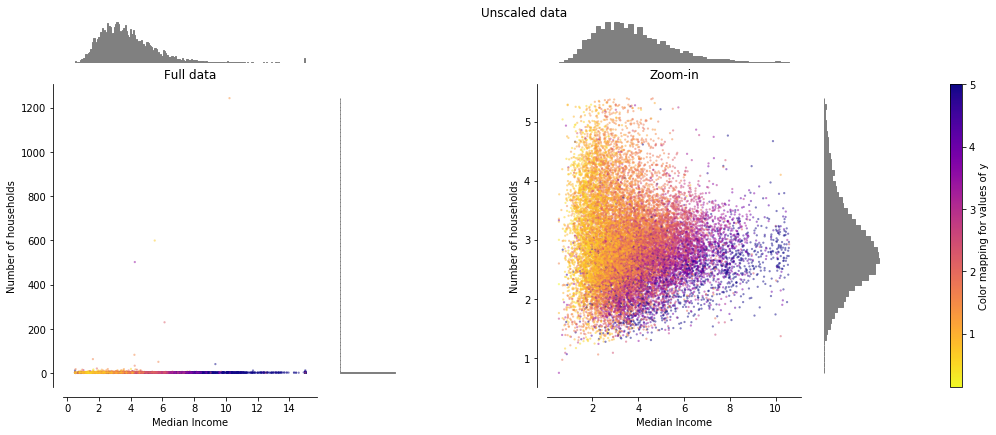

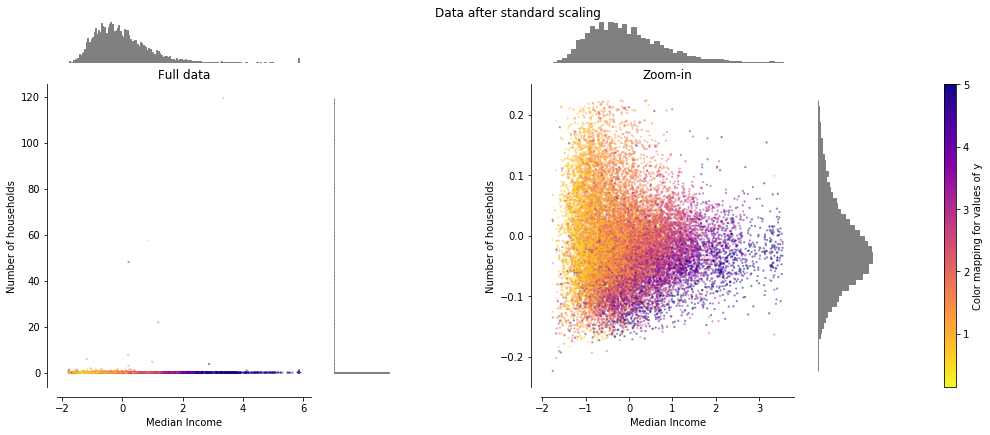

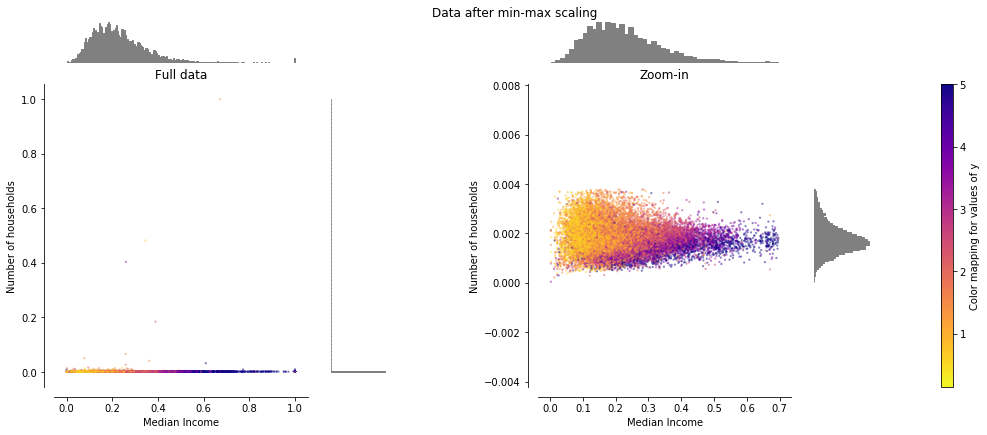

In [9]:
from functions import * 
make_plot(0) # Unscaled Data
make_plot(1) # Standard Scaled
make_plot(2) # MinMax Scaled